In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [11]:
### Check for hour start vs hour end timestamp

first = True
for YEAR in range(1993, 2020):
    
    print(YEAR)
    
    
    df = pd.read_csv(f'/Users/truggles/Downloads/PJM_DEMAND/hrl_load_metered_{YEAR}.csv')

    df = df[ (df['nerc_region'] == 'RTO') &
             (df['mkt_region'] == 'RTO') &
             (df['zone'] == 'RTO') &
             (df['load_area'] == 'RTO')           
           ]
        
    #print(df.head())
    print(f' - {len(df.index)}')
    
    df['datetime_beginning_utc'] = pd.to_datetime(df['datetime_beginning_utc'])
    df['datetime_end_utc'] = df['datetime_beginning_utc'].shift(periods=-1)
    df.loc[df.index[-1], 'datetime_end_utc'] = df.loc[df.index[-2], 'datetime_end_utc'] + timedelta(hours=1)
    
    if first:
        master = df[['datetime_beginning_utc', 'datetime_end_utc', 'mw']]
        master_cols = list(master.columns)
    else:
        master = master.append(df[['datetime_beginning_utc', 'datetime_end_utc', 'mw']])
        print(f' - {len(master.index)}')
    first = False


master.to_csv('tmp_PJM2.csv', index=False)

1993
 - 8759
1994
 - 8759
 - 17518
1995
 - 8759
 - 26277
1996
 - 8783
 - 35060
1997
 - 8759
 - 43819
1998
 - 8759
 - 52578
1999
 - 8759
 - 61337
2000
 - 8784
 - 70121
2001
 - 8759
 - 78880
2002
 - 8748
 - 87628
2003
 - 8757
 - 96385
2004
 - 8782
 - 105167
2005
 - 8760
 - 113927
2006
 - 8760
 - 122687
2007
 - 8760
 - 131447
2008
 - 8784
 - 140231
2009
 - 8758
 - 148989
2010
 - 8760
 - 157749
2011
 - 8760
 - 166509
2012
 - 8784
 - 175293
2013
 - 8760
 - 184053
2014
 - 8760
 - 192813
2015
 - 8760
 - 201573
2016
 - 8784
 - 210357
2017
 - 8760
 - 219117
2018
 - 8760
 - 227877
2019
 - 8760
 - 236637


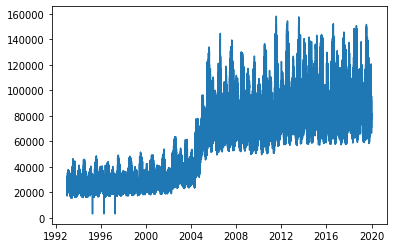

In [15]:
import matplotlib.pyplot as plt

df = pd.read_csv('tmp_PJM2.csv')
df['date_time'] = pd.to_datetime(df['datetime_end_utc'])
df.dtypes


fig, ax = plt.subplots()
ax.plot(df['date_time'], df['mw'])
plt.show()